## <center> Python Code </center>

### This Cell will allow you to setup the initial configuration


##### Please Note that arrow only represent the direction and scaled magnitude of the velocity

In [1]:
############## Event-DRIVEN COLLISIONS ####################################
###########################################################################

#### This Program simulates the motion of four atoms in a 2D box ######
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pt
from ipywidgets import*
from IPython.display import display  


######################### Initialization #################################
n_events_wd = IntSlider(description = "N_events",
                        layout = {'width':'600px'},value = 10,min = 5,max = 200,step = 5)
def f_main(L,N,rho,spac):
    global L_box,Ratom,positions,velocities,Natoms 
    velocities = np.random.uniform(low = -1.0,high = 1.0 ,size = (N*N,2))
    Natoms = N*N
    Ratom = np.sqrt((rho*L*L)/(Natoms*np.pi))
    print ("Radius of disk = " ,Ratom)
  
    L_box= L

    
    pos = np.array([],dtype = float)
    for i in range(0,N):
        for j in range(0,N):
          
            pos = np.append(pos,((2+i*spac)*Ratom,(2+j*spac)*Ratom))
       
    positions = pos.reshape(Natoms,2)   

    fig,ax = plt.subplots(figsize = (15,12))
    ax.set_xlim([0,L])
    ax.set_ylim([0,L])
    
    ax.set_title("Initial configuration")
 
    for x,y in positions:
        PP = pt.Circle((x,y),radius = Ratom,color = 'c')
        ax.add_patch(PP)
    
    
    
    for i in range(N*N):
        QQ = pt.Arrow(positions[i,0],positions[i,1],0.1*(L_box)*velocities[i,0],0.1*(L_box)*velocities[i,1],width = 0.03,color = 'k')
        ax.add_patch(QQ)
    plt.show()
###############################################333

#Giving some WARNINGS!!!!!

print("Initializing (cunstruct square lattice)")
print("Adjust sliders such that all  N*N balls lies within the box. ")
print("Direction of  velocities will be different when slider is changed becuz I am using Random distribution")



 

####################################################
ws = interactive(f_main, L = FloatSlider(description  = "Length of Box",value = 1.0,min = 0.5,step = 0.5,max = 10.0,layout = {'width':'600px'}),
                        N = IntSlider(description = "N*N atoms",value = 2,min = 2,max = 10,layout = {'width':'600px'}),
                        rho = FloatSlider(description = 'density',value = 0.1,min = 0.1,max = 0.9,layout = {'width':'600px'}),
                        spac = FloatSlider(description = 'adjusting space',value = 3.0,min = 0.1,max = 20.0,layout = {'width':'600px'}),
                  )
                
    

display(n_events_wd,ws)    

Initializing (cunstruct square lattice)
Adjust sliders such that all  N*N balls lies within the box. 
Direction of  velocities will be different when slider is changed becuz I am using Random distribution


IntSlider(value=10, description='N_events', layout=Layout(width='600px'), max=200, min=5, step=5)

interactive(children=(FloatSlider(value=1.0, description='Length of Box', layout=Layout(width='600px'), max=10…

## After setting up the configuration Run the cell below it will plot the  *FIRST EVENT SNAPSHOT*  

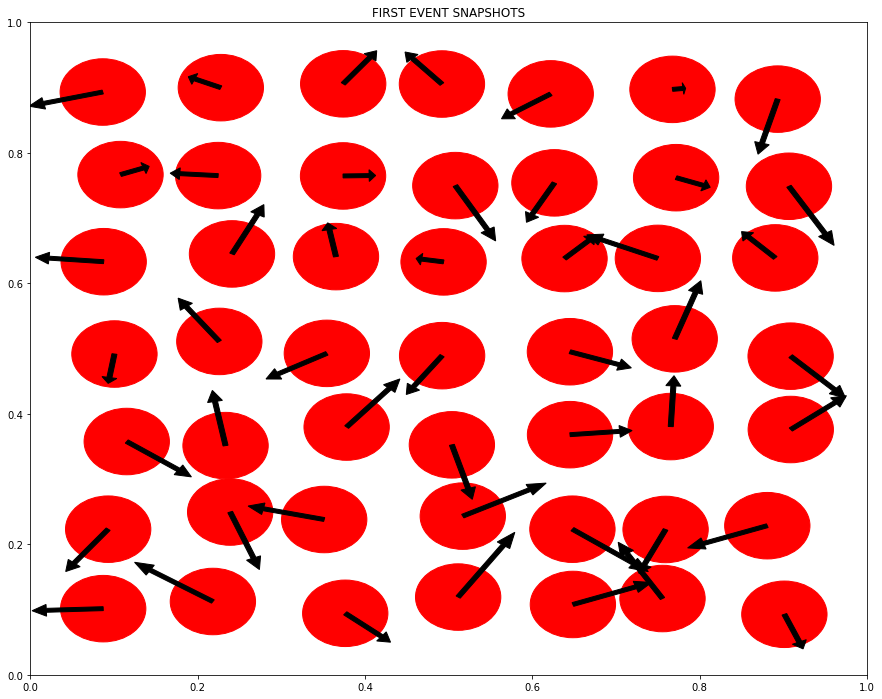

In [2]:

#####  Function to compute time for wall collision ######
def wall_time(coord, velcomp, rad,L_box):  
    if velcomp > 0.0:
        del_t = (L_box - rad - coord) / velcomp
    elif velcomp < 0.0:
        del_t = (coord - rad) / abs(velcomp)
    else:
        del_t = float('inf')
    return del_t


# Function to calculate time it takes for a pair of atoms to collide. 
# pos1 and pos2 are positions of atoms 1 and 2, vel1 and vel2 are their 
# velocities. rad is the radius of the atoms. 
def pair_time(pos1, vel1, pos2, vel2, rad):  
    rel_pos = pos2 - pos1
    rel_vel = vel2 - vel1
    rel_dist_squar = np.dot(rel_pos,rel_pos)
    rel_speed_squar = np.dot(rel_vel,rel_vel)
    scal_prod = np.dot(rel_pos,rel_vel)
    a = scal_prod ** 2 - rel_speed_squar * ( rel_dist_squar - 4.0 * rad **2)
    if a > 0.0 and scal_prod < 0.0: ## Conditions for collision.
        del_t = - (scal_prod + np.sqrt(a)) / rel_speed_squar ## Collision time.
    else:
        del_t = float('inf')
    return del_t


##########################################################################
L = L_box
n_events = n_events_wd.value
pairs = [[i,j] for i in range(Natoms) for j in range(i+1, Natoms)] 

############### Event Loop ##############################################
for iter in range(n_events):
    # Wall collision times for all atoms and their velocity components.
    wall_times = [wall_time(positions[i,j], velocities[i][j], Ratom,L_box) for i in range(Natoms) for j in range(2)] 
    # Pair collision times
    pair_times = [pair_time(positions[i], velocities[i], positions[j], velocities[j], Ratom) for i,j in pairs] 
    # The next collision iter is the minimum of wall and pair collision times.

    next_iter = min(wall_times + pair_times)  

    for i in range(Natoms):
        positions[i] += velocities[i]*abs(next_iter) # Evolve positions to collision iter
    if min(wall_times) < min(pair_times): # Check if next iter is a collision with a wall
        wall_index = wall_times.index(next_iter)
        particle, component = wall_index/2, wall_index%2
        velocities[int(particle),int(component)] *= -1.0 ## Velocity component normal to wall changes sign
    else:
        pair_index = pair_times.index(next_iter)
        particle_1, particle_2 = pairs[pair_index] # Indices of atoms participating in collision.
        rel_pos = positions[particle_2] - positions[particle_1]
        rel_vel = velocities[particle_2] - velocities[particle_1]
        distance = np.sqrt(np.dot(rel_pos,rel_pos))
        unit_perp = rel_pos/distance
        scal_prod = np.dot(rel_vel,unit_perp)
        velocities[particle_1] += scal_prod*unit_perp # Change in velocities of atoms colliding with each other
        velocities[particle_2] -= scal_prod*unit_perp


        
    if(iter==0):
        fig,ax = plt.subplots(figsize = (15,12))
        ax.set_xlim([0,L])
        ax.set_ylim([0,L])
        ax.set_title("FIRST EVENT SNAPSHOTS")
        for x,y in positions:
            PP = pt.Circle((x,y),radius = Ratom,color = 'r')
            ax.add_patch(PP)




        for i in range(Natoms):
            QQ = pt.Arrow(positions[i,0],positions[i,1],0.1*(L_box)*velocities[i,0],0.1*(L_box)*velocities[i,1],width = 0.03,color = 'k')
            ax.add_patch(QQ)
                
        FIRST_SNAP = fig
    plt.show()


## Now we will use  the last position array obtained from above simulation and reverse the velocity

In [3]:
velocities = -1.0*velocities
positions = positions

## Evolving this new configuration till n_events and saving the *FINAL EVENT SNAPSHOT*

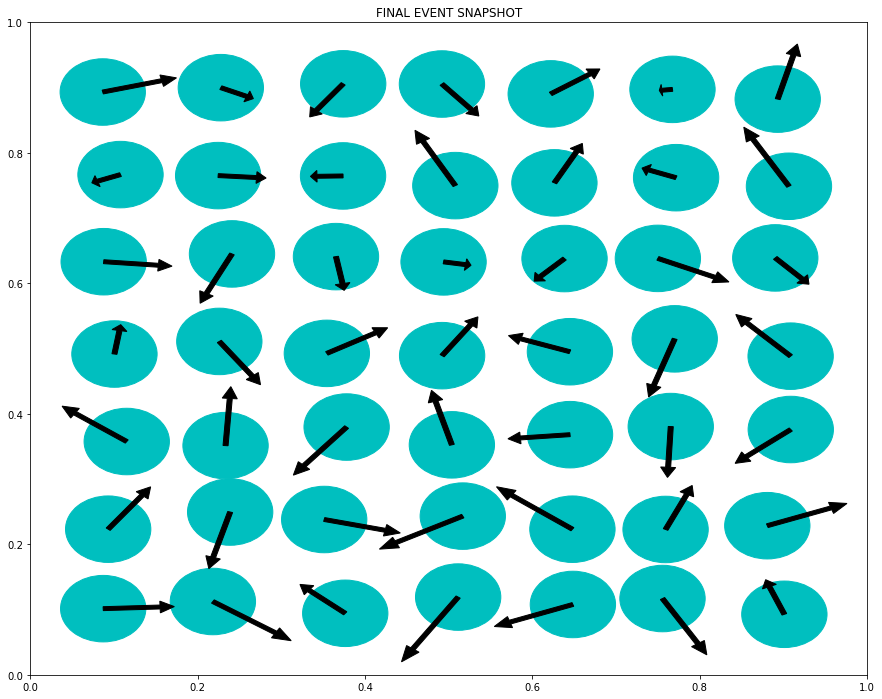

In [4]:

## List indexing all pairs of atoms.
pairs = [[i,j] for i in range(Natoms) for j in range(i+1, Natoms)] 

## Positions and velocities as numpy arrays.
L = L_box
n_events = n_events_wd.value # Number of collision iters.

############### Event Loop ##############################################
for iter in range(n_events):
    # Wall collision times for all atoms and their velocity components.
    wall_times = [wall_time(positions[i,j], velocities[i][j], Ratom,L_box) for i in range(Natoms) for j in range(2)] 
    # Pair collision times
    pair_times = [pair_time(positions[i], velocities[i], positions[j], velocities[j], Ratom) for i,j in pairs] 
    # The next collision iter is the minimum of wall and pair collision times.

    next_iter = min(wall_times + pair_times)  
    
    for i in range(Natoms):
        positions[i] += velocities[i]*next_iter # Evolve positions to collision iter
    if min(wall_times) < min(pair_times): # Check if next iter is a collision with a wall
        wall_index = wall_times.index(next_iter)
        particle, component = wall_index/2, wall_index%2
        velocities[int(particle),int(component)] *= -1.0 ## Velocity component normal to wall changes sign
    else:
        pair_index = pair_times.index(next_iter)
        particle_1, particle_2 = pairs[pair_index] # Indices of atoms participating in collision.
        rel_pos = positions[particle_2] - positions[particle_1]
        rel_vel = velocities[particle_2] - velocities[particle_1]
        distance = np.sqrt(np.dot(rel_pos,rel_pos))
        unit_perp = rel_pos/distance
        scal_prod = np.dot(rel_vel,unit_perp)
        velocities[particle_1] += scal_prod*unit_perp # Change in velocities of atoms colliding with each other
        velocities[particle_2] -= scal_prod*unit_perp

        if(iter==n_events-1):
            fig,ax = plt.subplots(figsize = (15,12))
            ax.set_xlim([0,L_box])
            ax.set_ylim([0,L_box])
            ax.set_title("FINAL EVENT SNAPSHOT")
            for x,y in positions:
                PP = pt.Circle((x,y),radius = Ratom,color = 'c')
                ax.add_patch(PP)




            for i in range(Natoms):
                QQ = pt.Arrow(positions[i,0],positions[i,1],0.1*(L_box)*velocities[i,0],0.1*(L_box)*velocities[i,1],width = 0.03,color = 'k')
                ax.add_patch(QQ)
            FINAL_SNAP = fig
        
        plt.show()


## Comparing *FIRST EVENT SNAPSHOT* and *FINAL EVENT SNAPSHOT* 

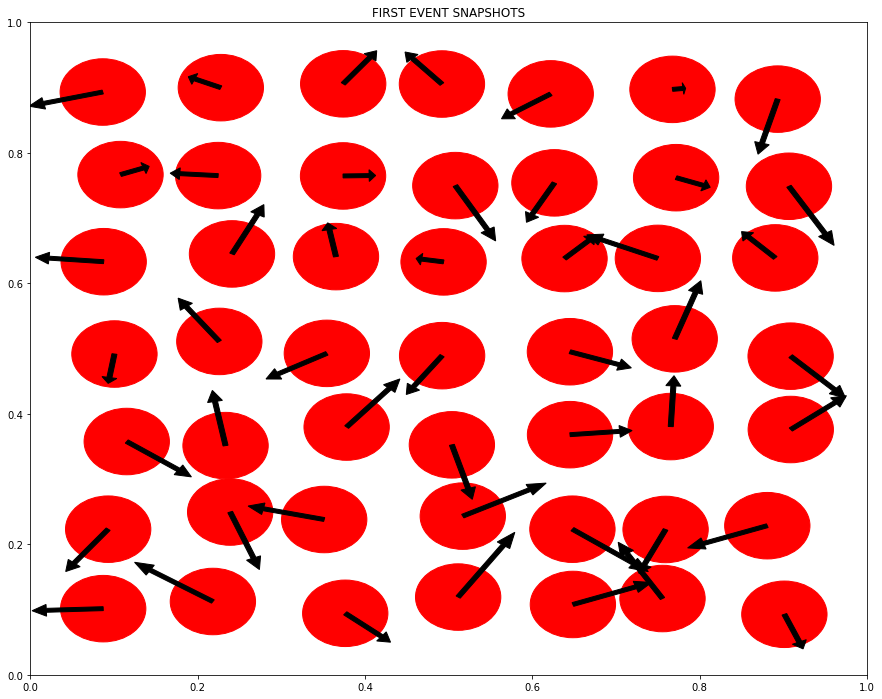

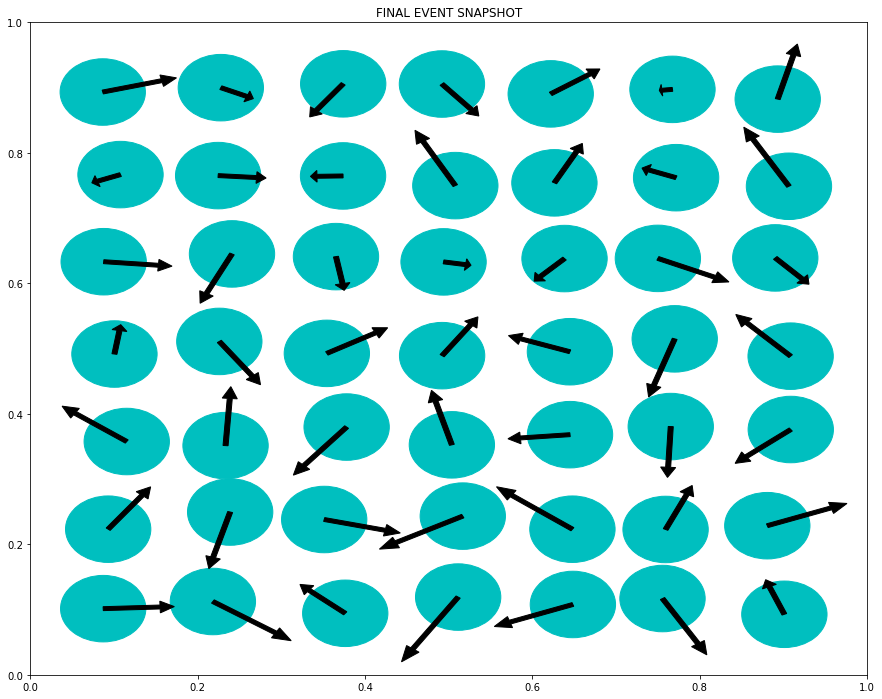

In [5]:
from IPython.display import  display
display(FIRST_SNAP,FINAL_SNAP)

# $VOILA !!!$
### You could  see that  both configurations are same(but velocity reversed). Note that  we could only get this because number of iterations wasn't large$^{1}$. When this number increases system reaches to equilibrium then this time reversal won't be there cuz when equilibrium is reached the notion of arrow of time is lost!!
for this you have to study Stat Mech and it is what it is :")

--------------------------------------
1. By large, we usually mean of the order of Avogadro number, though much smaller systems will typically still show a
   time-asymmetric behaviour
